### In this demo, we use the news dataset from the SKLEARN. We show how to process the textual data and extract the topics of each news using Gensim LDA algorithms.


#### (1) LDA is an unsupervised learning method whose goal is to mine a set of topics from a corpus of unlabelled document.
#### (2) There are several things need to be considered: (a) what the unit of words to be considered, (b) how to select the best of number of topics

In [5]:
! pip install spacy

     |████████████████████████████████| 6.1 MB 162 kB/s eta 0:00:01
     |████████████████████████████████| 449 kB 163 kB/s eta 0:00:01
     |████████████████████████████████| 5.8 MB 150 kB/s eta 0:00:01
     |████████████████████████████████| 181 kB 155 kB/s eta 0:00:01
     |████████████████████████████████| 42 kB 536 kB/s eta 0:00:01
     |████████████████████████████████| 2.6 MB 128 kB/s eta 0:00:01
     |████████████████████████████████| 104 kB 100 kB/s eta 0:00:01
     |████████████████████████████████| 601 kB 83 kB/s eta 0:00:011
     |████████████████████████████████| 58 kB 58 kB/s eta 0:00:01
     |████████████████████████████████| 97 kB 136 kB/s eta 0:00:01
  Attempting uninstall: smart-open
    Found existing installation: smart-open 2.1.0
    Uninstalling smart-open-2.1.0:
      Successfully uninstalled smart-open-2.1.0
  Attempting uninstall: click
    Found existing installation: Click 7.0
    Uninstalling Click-7.0:
      Successfully uninstalled Click-7.0
You should con

In [8]:
!python -m spacy download en_core_web_sm

     |████████████████████████████████| 13.9 MB 3.8 MB/s eta 0:00:01
You should consider upgrading via the '/Users/houping/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


#### Download the news dataset from sklearn. 

In [1]:
from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups(subset='all')['data']

In [2]:
len(data)

18846

In [3]:
data[:2]

["From: Mamatha Devineni Ratnam <mr47+@andrew.cmu.edu>\nSubject: Pens fans reactions\nOrganization: Post Office, Carnegie Mellon, Pittsburgh, PA\nLines: 12\nNNTP-Posting-Host: po4.andrew.cmu.edu\n\n\n\nI am sure some bashers of Pens fans are pretty confused about the lack\nof any kind of posts about the recent Pens massacre of the Devils. Actually,\nI am  bit puzzled too and a bit relieved. However, I am going to put an end\nto non-PIttsburghers' relief with a bit of praise for the Pens. Man, they\nare killing those Devils worse than I thought. Jagr just showed you why\nhe is much better than his regular season stats. He is also a lot\nfo fun to watch in the playoffs. Bowman should let JAgr have a lot of\nfun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final\nregular season game.          PENS RULE!!!\n\n",
 'From: mblawson@midway.ecn.uoknor.edu (Matthew B Lawson)\nSubject: Which h

#### LDA sometimes runs slow. We will use a small subsamples to train the model. You can train another topic model using the whole dataset offline

In [4]:
text = data[:200]

#### spacy and nltk are two popular packages for nlp tasks. More codes and demos can be found here https://www.findbestopensource.com/tagged/topic-modeling

In [5]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [24]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
ps = PorterStemmer()
### find the stem word root

In [25]:
def preprocess_text(text):
    doc1 = nlp(text.lower())
    preprocessed_txt = [str(token.lemma_) for token in doc1 if not token.is_stop and not token.is_punct and not token.is_digit and token.is_ascii]
    #preprocessed_txt = [ps.stem(w) for w in preprocessed_txt]
    return preprocessed_txt

In [26]:
corpus_txt = [preprocess_text(t) for t in text]

In [27]:
import gensim
import matplotlib.pyplot as plt
## getting the bigrams and trigrams tokens for a list of news.
## You can also consider 4, 5 words-level units
## corpus_txt: tokenized words
## threshold = Only phrases scoring above this will be accepted
## min_count = Terms with a count lower than this will be ignored
## scoring = Specifies how potential phrases are scored for comparison to the threshold setting

## train the bigram and trigram models using the corpus_txt
bigram = gensim.models.Phrases(corpus_txt,threshold = 10e-5, min_count=3, 
                               scoring = "npmi") 
trigram = gensim.models.Phrases(bigram[corpus_txt], threshold = 10e-5, 
                                min_count=5, scoring = "npmi")

In [28]:
def get_bigrams(texts):
    return [bigram[sentence] for sentence in texts]
def get_trigrams(texts):
    return [trigram[bigram[sentence]] for sentence in texts]
## extract all bigrams and trigrams list
data_bigrams = get_bigrams(corpus_txt)
data_trigrams = get_trigrams(corpus_txt)


In [29]:
import re
def is_phrase_of_type(word,phrase_type):
    if phrase_type == "bigram":
        substring = "[a-z]+(_)[a-z]+"
    else:
        substring = "[a-z]+(_)[a-z]+(_)[a-z]+"
    if re.search(substring, word):
        return True
    return False

In [30]:
def frequency_dictionary(data,phrase_type):
    count_dict = {}
    for sentence in data:
        for word in sentence:
            if is_phrase_of_type(word,phrase_type):
                if word in count_dict.keys():
                    count_dict[word] = count_dict[word]+1
                else:
                    count_dict[word] = 1
            else:
                pass
    return count_dict
bigram_count_dict = frequency_dictionary(data_bigrams,"bigram")
trigram_count_dict = frequency_dictionary(data_trigrams,"trigram")

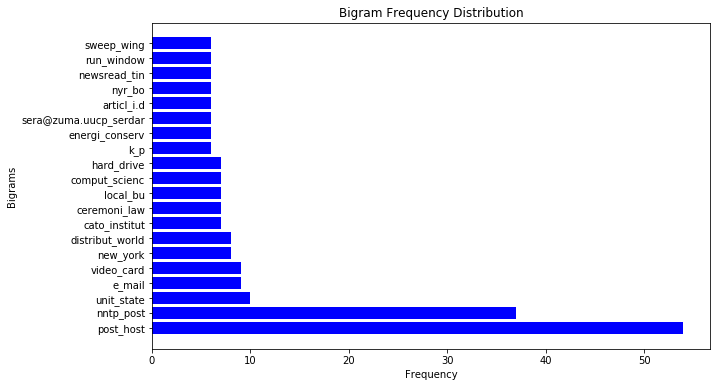

In [64]:
import pandas as pd
bigram_data_items = bigram_count_dict.items()
bigram_data_list = list(bigram_data_items)
bigram_df = pd.DataFrame(bigram_data_list,columns=['word','count'])
bigram_df = bigram_df.sort_values(by=['count'],ascending=False,ignore_index=True).head(20)

fig = plt.figure(figsize=(10,6))
y=bigram_df['word']
x=bigram_df['count']
plt.barh(y, x,align='center',color='blue', ecolor='black')
plt.ylabel("Bigrams")
plt.xlabel("Frequency") 
plt.title("Bigram Frequency Distribution")
plt.show()


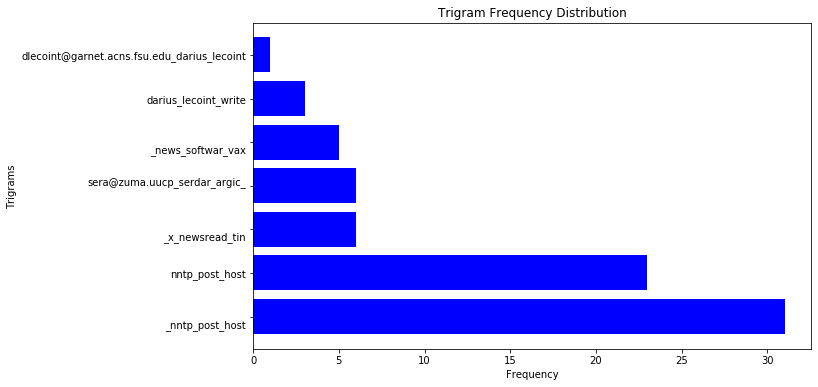

In [63]:
trigram_data_items = trigram_count_dict.items()
trigram_data_list = list(trigram_data_items)
trigram_df = pd.DataFrame(trigram_data_list,columns=['word','count'])
trigram_df = trigram_df.sort_values(by=['count'],ascending=False,ignore_index=True).head(20)

fig = plt.figure(figsize=(10,6))
y=trigram_df['word']
x=trigram_df['count']
plt.barh(y, x,align='center',color='blue', ecolor='black')
plt.ylabel("Trigrams")
plt.xlabel("Frequency") 
plt.title("Trigram Frequency Distribution")
plt.show()


In [33]:
def return_noun_and_verb_chunks(texts):
    pos_tags_to_keep =['NOUN', 'ADJ','PROPN','VERB','ADV']
    list_to_return = []
    for sentence in texts:
        doc3 = nlp(" ".join(sentence)) 
        list_to_return.append([str(token) for token in doc3 if token.pos_ in pos_tags_to_keep])
    return list_to_return
data_for_lda = return_noun_and_verb_chunks(data_bigrams)

In [34]:
from gensim.corpora.dictionary import Dictionary
def create_dictionary_for_lda(data_for_lda):
    lda_dict = Dictionary(data_for_lda)
    return lda_dict

lda_dictionary = create_dictionary_for_lda(data_for_lda)
lda_dictionary.filter_extremes(no_below=5)           
texts = data_for_lda


In [35]:
bow_corpus = [lda_dictionary.doc2bow(text) for text in texts]


#### gensim ldaModel allows both LDA model estimation from a training corpus and inference of topic distribution on new, unseen documents
#### The model can also be updated with new documents for online training

Round: 10
Round: 15
Round: 20
Round: 25
Round: 30
Round: 35
Round: 40
Round: 45
Round: 50
Round: 55
Round: 60
Round: 65
Round: 70
Round: 75
Round: 80
Round: 85
Round: 90
Round: 95


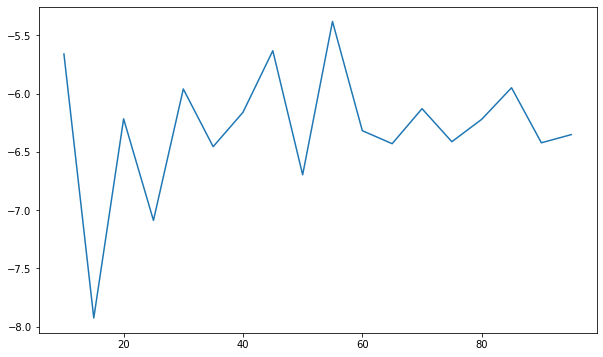

In [62]:
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

def perform_grid_Search():
    coherence = []
    topics = [i for i in range(10,100,5)]
    for k in topics:
        print('Round: '+str(k))
        lda_model_bow = gensim.models.ldamodel.LdaModel(corpus=bow_corpus,id2word=lda_dictionary,num_topics=k, 
                                               random_state=44,update_every=1,iterations=20,
                                            chunksize=5,passes=2,alpha='auto',eta = 0.1,
                                               per_word_topics=True)
#         coherence_model_lda = coherence_model_lda = CoherenceModel(model=lda_model_bow, texts=data_for_lda, 
#                                                             dictionary=lda_dictionary, coherence='c_v')
        coherence_model_lda = coherence_model_lda = gensim.models.CoherenceModel(model=lda_model_bow, corpus =  bow_corpus,
                                                            dictionary=lda_dictionary, coherence='u_mass')
        coherence.append((k,coherence_model_lda.get_coherence()))
    return coherence
coherence = perform_grid_Search()

fig = plt.figure(figsize=(10,6))
plt.plot(*zip(*coherence))
plt.show() 

In [47]:
lda_model_bow = gensim.models.ldamodel.LdaModel(corpus=bow_corpus,id2word=lda_dictionary,num_topics=10, 
                                           random_state=44,update_every=1,iterations=20,
                                        chunksize=5,passes=2,alpha='auto',eta = 0.1,
                                           per_word_topics=True)

In [59]:
k=10

In [60]:
import matplotlib.gridspec as gridspec
import math
def plot_top_words(lda=lda_model_bow, nb_topics=k, nb_words=10):
    top_words = [[word for word,_ in lda.show_topic(topic_id, topn=50)] for topic_id in range(lda.num_topics)]
    top_betas = [[beta for _,beta in lda.show_topic(topic_id, topn=50)] for topic_id in range(lda.num_topics)]

    gs  = gridspec.GridSpec(round(math.sqrt(k))+1,round(math.sqrt(k))+1)
    gs.update(wspace=0.5, hspace=0.5)
    plt.figure(figsize=(20,15))
    for i in range(nb_topics):
        ax = plt.subplot(gs[i])
        plt.barh(range(nb_words), top_betas[i][:nb_words], align='center',color='blue', ecolor='black')
        ax.invert_yaxis()
        ax.set_yticks(range(nb_words))
        ax.set_yticklabels(top_words[i][:nb_words])
        plt.title("Topic "+str(i))

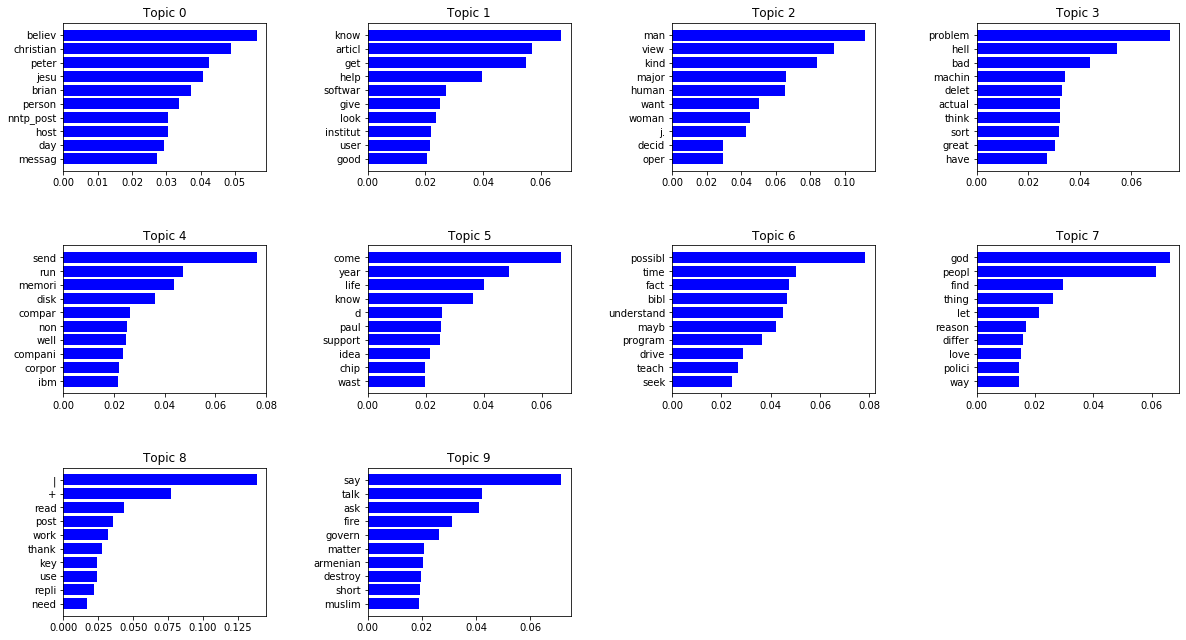

In [61]:
plot_top_words()

In [44]:
for idx, topic in lda_model_bow.print_topics(-1): 
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.124*"god" + 0.044*"christian" + 0.037*"jesu" + 0.033*"send" + 0.026*"day" + 0.023*"state" + 0.023*"david" + 0.023*"choos" + 0.022*"happen" + 0.022*"delet"
Topic: 1 
Words: 0.063*"know" + 0.039*"believ" + 0.038*"articl" + 0.034*"good" + 0.032*"get" + 0.023*"help" + 0.020*"brian" + 0.016*"look" + 0.015*"new" + 0.015*"person"
Topic: 2 
Words: 0.043*"peopl" + 0.029*"say" + 0.024*"come" + 0.020*"find" + 0.015*"ask" + 0.014*"world" + 0.014*"hell" + 0.013*"fact" + 0.013*"man" + 0.012*"life"
Topic: 3 
Words: 0.041*"possibl" + 0.038*"read" + 0.030*"post" + 0.026*"univers" + 0.024*"peter" + 0.023*"mayb" + 0.020*"nntp_post" + 0.020*"host" + 0.019*"talk" + 0.018*"messag"
Topic: 4 
Words: 0.083*"|" + 0.046*"+" + 0.025*"problem" + 0.018*"run" + 0.018*"use" + 0.018*"thank" + 0.017*"need" + 0.016*"work" + 0.016*"system" + 0.015*"bad"


In [48]:
lda_model_bow[bow_corpus[0]]

([(0, 0.029582115),
  (1, 0.045836344),
  (2, 0.043962914),
  (3, 0.3113922),
  (4, 0.11100116),
  (5, 0.07689363),
  (6, 0.022925299),
  (7, 0.07517589),
  (8, 0.26115748),
  (9, 0.022072963)],
 [(0, [3]),
  (1, [3]),
  (2, [8]),
  (3, [3]),
  (4, [3]),
  (5, [3]),
  (6, [3, 4]),
  (7, [3]),
  (8, [3]),
  (9, [3]),
  (10, [3, 5, 7, 8]),
  (11, [5]),
  (12, [2, 3]),
  (13, [4]),
  (14, [7]),
  (15, [3]),
  (16, [8]),
  (17, [2]),
  (18, [5]),
  (19, [8, 5, 1, 7]),
  (20, [4]),
  (21, [8]),
  (22, [8, 5, 1, 7]),
  (23, [3]),
  (24, [8, 1]),
  (25, [8]),
  (26, [4]),
  (27, [8]),
  (28, [8]),
  (29, [3, 1, 7, 6, 5]),
  (30, [3]),
  (31, [4])],
 [(0, [(3, 0.9999858)]),
  (1, [(3, 0.99998957)]),
  (2, [(8, 2.9998503)]),
  (3, [(3, 0.9998722)]),
  (4, [(3, 0.99992627)]),
  (5, [(3, 0.9999125)]),
  (6, [(3, 0.944473), (4, 0.05549448)]),
  (7, [(3, 1.9997703)]),
  (8, [(3, 0.99998254)]),
  (9, [(3, 1.9998524)]),
  (10, [(3, 1.5442019), (5, 0.34824806), (7, 0.05951903), (8, 0.047990356)]),
  (

In [ ]:
lda_model_bow2 = gensim.models.ldamodel.LdaModel(corpus=bow_corpus,id2word=lda_dictionary,num_topics=10, 
                                           random_state=44,update_every=1,iterations=20,
                                        chunksize=5,passes=2,alpha='auto',eta = 0.1,
                                           per_word_topics=True)